In [1]:
pip install geopandas pandas folium geopy geocoder

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium


In [ ]:
# read file
evs_merged_df = pd.read_csv("EVS_merged_data.csv")
evs_merged_df

,Customer ID,Customer Role,Address,City,State,Zipcode,Country
0,100004,Consumer,2860 Merchant Ct,Waldorf,MD,20603,United States
1,1001,Consumer,1152 Llagas Rd,MORGAN HILL,CA,95037,United States
2,1002,Vet,154 ROUTE 17K,Falls Church,NY,12550,United States
3,10023,Consumer,107 BERRY PATCH LN,DOTHAN,AL,36301-6047,United States
4,10024,Consumer,3794 SEMINOLE RD,FOREST HILL,WV,24935,United States
...,...,...,...,...,...,...,...
7083,wwh126@gmail.com,Consumer,41 Halpin Av,STATEN ISLAND,NY,10312,United States
7084,yaisaha@gmail.com,Consumer,14503 Studebaker Rd,Norwalk,CA,90650,United States
7085,yanaherbalbeauty@gmail.com,Consumer,300 Gorge Road,Cliffside Park,NJ,07010,United States
7086,youcancontactdiana@gmail.com,Consumer,557 Atlantic Avenue Apt. 3G,BROOKLYN,NY,11216,United States


In [13]:
from geopy.exc import GeocoderTimedOut
import time
from geopy.geocoders import Nominatim

# Initialize the geolocator
geolocator = Nominatim(user_agent="EVSGeocoder")

def geocode_address(row):
    """Construct full address string and attempt geocoding."""
    # Combine available address components
    address_components = [
        str(row.get("Address", "")),
        str(row.get("City", "")),
        str(row.get("State", "")),
        str(row.get("Zipcode", "")),
        str(row.get("Country", ""))
    ]
    full_address = ", ".join(filter(None, address_components))  # Filter out empty components
    
    for _ in range(3):  # Retry up to 3 times
        try:
            location = geolocator.geocode(full_address, timeout=10)
            if location:
                return location.latitude, location.longitude
        except GeocoderTimedOut:
            time.sleep(2)  # Wait before retrying
    return None, None

# Apply geocoding to the DataFrame
evs_merged_df['latitude'], evs_merged_df['longitude'] = zip(
    *evs_merged_df.apply(geocode_address, axis=1)
)

evs_merged_df

,Customer ID,Customer Role,Address,City,State,Zipcode,Country,latitude,longitude
0,100004,Consumer,2860 Merchant Ct,Waldorf,MD,20603,United States,NaN,NaN
1,1001,Consumer,1152 Llagas Rd,MORGAN HILL,CA,95037,United States,37.133084,-121.679663
2,1002,Vet,154 ROUTE 17K,Falls Church,NY,12550,United States,NaN,NaN
3,10023,Consumer,107 BERRY PATCH LN,DOTHAN,AL,36301-6047,United States,NaN,NaN
4,10024,Consumer,3794 SEMINOLE RD,FOREST HILL,WV,24935,United States,37.572540,-80.795297
...,...,...,...,...,...,...,...,...,...
7083,wwh126@gmail.com,Consumer,41 Halpin Av,STATEN ISLAND,NY,10312,United States,40.553929,-74.186100
7084,yaisaha@gmail.com,Consumer,14503 Studebaker Rd,Norwalk,CA,90650,United States,33.899683,-118.100136
7085,yanaherbalbeauty@gmail.com,Consumer,300 Gorge Road,Cliffside Park,NJ,07010,United States,40.813744,-73.990066
7086,youcancontactdiana@gmail.com,Consumer,557 Atlantic Avenue Apt. 3G,BROOKLYN,NY,11216,United States,NaN,NaN


In [15]:
# check NAs
evs_merged_df.isnull().sum()

Customer ID         0
Customer Role       0
Address             0
City                0
State               0
Zipcode           299
Country             0
latitude         2501
longitude        2501
dtype: int64

In [16]:
# drop NAs
evs_geo_df = evs_merged_df.dropna()
evs_geo_df

,Customer ID,Customer Role,Address,City,State,Zipcode,Country,latitude,longitude
1,1001,Consumer,1152 Llagas Rd,MORGAN HILL,CA,95037,United States,37.133084,-121.679663
4,10024,Consumer,3794 SEMINOLE RD,FOREST HILL,WV,24935,United States,37.572540,-80.795297
5,100242,Consumer,2009 AUSTRIAN WAY,COLORADO SPRINGS,CO,80919,United States,38.932074,-104.862528
7,10031,Consumer,10325 JUNCTION HILL DR,LAS VEGAS,NV,89134,United States,36.213829,-115.321555
9,100395,Consumer,531 SAVANNAH RD,LADSON,SC,29456,United States,33.023528,-80.093853
...,...,...,...,...,...,...,...,...,...
7082,wsantiago126@gmail.com,Consumer,200 Broad Street,STAMFORD,CT,06901,United States,41.055403,-73.534527
7083,wwh126@gmail.com,Consumer,41 Halpin Av,STATEN ISLAND,NY,10312,United States,40.553929,-74.186100
7084,yaisaha@gmail.com,Consumer,14503 Studebaker Rd,Norwalk,CA,90650,United States,33.899683,-118.100136
7085,yanaherbalbeauty@gmail.com,Consumer,300 Gorge Road,Cliffside Park,NJ,07010,United States,40.813744,-73.990066


In [ ]:
# save file
# evs_geo_df.to_excel('evs_geo_data.xlsx', index = False)

In [ ]:
# check categories in "Customer Role" column
evs_geo_df["Customer Role"].value_counts()

Customer Role
Consumer    3236
Vet         1348
Name: count, dtype: int64

In [3]:
# Filter vets and consumers DF based on the 'Customer Role' column
vet_df = evs_geo_df[evs_geo_df['Customer Role'] == "Vet"]

consumer_df = evs_geo_df[evs_geo_df['Customer Role'] == "Consumer"]

# Extract latitude and longitude coordinates
vet_coords = vet_df[['latitude', 'longitude']].dropna().values
consumer_coords = consumer_df[['latitude', 'longitude']].dropna().values

In [ ]:
#### Plot the geolocation data for β clinics and ∂ consumers

# Initialize the map
m = folium.Map(location=[39.8283, -98.5795], zoom_start= 5, tiles='CartoDB Positron')

# Plot consumers (red) and vets (blue) on the map using smaller CircleMarkers
for _, row in consumer_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=1.5,  # Smaller radius for consumers
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.5,
        popup=f"Consumer ID: {row['Customer ID']}"
    ).add_to(m)

for _, row in vet_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,  # Even smaller radius for vets
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5,
        popup=f"Vet ID: {row['Customer ID']}"
    ).add_to(m)

# Save the map
m.save('vets_consumers_map.html')

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_38288/3115883650.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumer_df['cluster'] = clusters


Number of clusters: 4
Cluster sizes:
cluster
0     759
1    2458
2      10
3       5
Name: count, dtype: int64
Noise points: 4


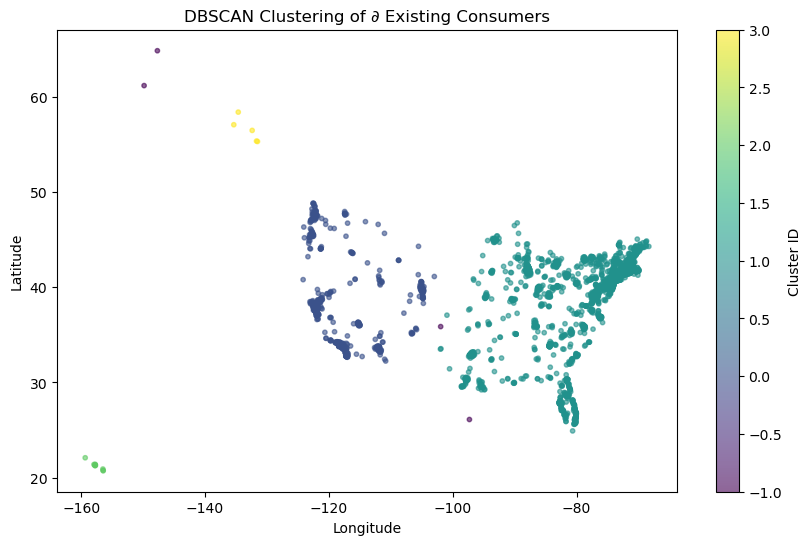

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_38288/3115883650.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', n_clusters)


Interactive map saved as 'consumer_clusters_with_vets_map.html'.


In [ ]:
from sklearn.cluster import DBSCAN
from matplotlib import colors

# Convert coordinates to radians for DBSCAN with haversine metric
consumer_coords_radians = np.radians(consumer_coords)

# Apply DBSCAN for clustering of Existing Consumers
dbscan = DBSCAN(eps=0.05, min_samples=5, metric='haversine')  # Adjust eps for proximity sensitivity
clusters = dbscan.fit_predict(consumer_coords_radians)
consumer_df['cluster'] = clusters

# Identify actionable metrics
cluster_counts = consumer_df['cluster'].value_counts().sort_index()
n_clusters = len(cluster_counts[cluster_counts.index != -1])  # Exclude noise cluster (-1)
print(f"Number of clusters: {n_clusters}")
print(f"Cluster sizes:\n{cluster_counts[cluster_counts.index != -1]}")
print(f"Noise points: {cluster_counts.get(-1, 0)}")  #Points labeled with a cluster ID of -1 are considered noise points

# Plot clustering results
plt.figure(figsize=(10, 6))
plt.scatter(
    consumer_df['longitude'], consumer_df['latitude'],
    c=consumer_df['cluster'], cmap='viridis', s=10, alpha=0.6
)
plt.colorbar(label='Cluster ID')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering of ∂ Existing Consumers')
plt.show()

# Combine clusters and clinic data on an interactive map
m = folium.Map(location=[39.8283, -98.5795], zoom_start=5, tiles="CartoDB Positron")

# Add consumer clusters to the map
cmap = plt.cm.get_cmap('viridis', n_clusters)
cluster_colors = {i: colors.rgb2hex(cmap(i)) for i in range(n_clusters)}

for _, row in consumer_df.iterrows():
    cluster_id = row['cluster']
    color = cluster_colors.get(cluster_id, 'gray')  # Default to gray if no color is assigned
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,  # Adjust the size for better visibility
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"Consumer ID: {row['Customer ID']}, Cluster: {cluster_id}"
    ).add_to(m)

for _, row in vet_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,  # Even smaller radius for vets
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5,
        popup=f"Vet ID: {row['Customer ID']}"
    ).add_to(m)

# Save and display the map
m.save("consumer_clusters_with_vets_map.html")
print("Interactive map saved as 'consumer_clusters_with_vets_map.html'.")

Number of clusters: 5
Cluster sizes:
cluster
0    1048
1      77
2     119
3      85
4       8
Name: count, dtype: int64
Noise points: 11


/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_38288/2686630263.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vet_df['cluster'] = vet_clusters


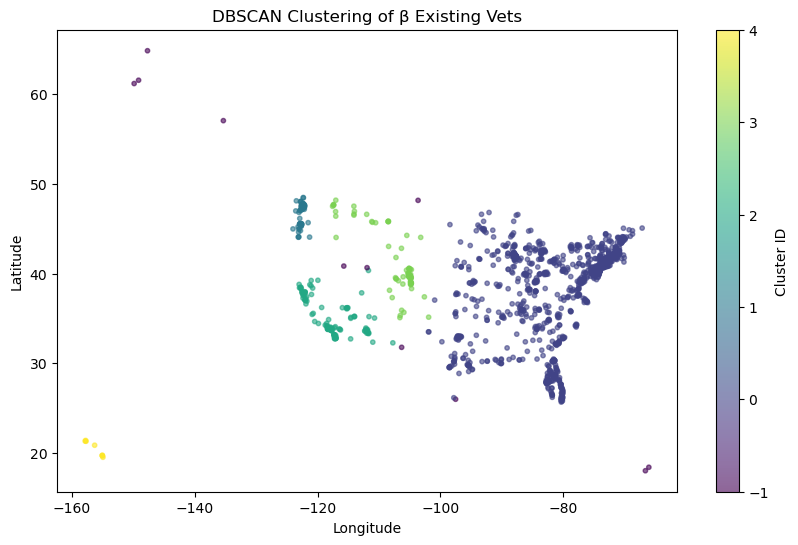

In [ ]:
### DBSCAN Clustering for Existing Vets

# Convert coordinates to radians for DBSCAN with haversine metric
vet_coords_radians = np.radians(vet_coords)

# Apply DBSCAN for clustering
dbscan = DBSCAN(eps=0.05, min_samples=5, metric='haversine')  # Adjust eps for proximity sensitivity
vet_clusters = dbscan.fit_predict(vet_coords_radians)
vet_df['cluster'] = vet_clusters

# Identify actionable metrics
cluster_counts = vet_df['cluster'].value_counts().sort_index()
n_clusters = len(cluster_counts[cluster_counts.index != -1])  # Exclude noise cluster (-1)
print(f"Number of clusters: {n_clusters}")
print(f"Cluster sizes:\n{cluster_counts[cluster_counts.index != -1]}")
print(f"Noise points: {cluster_counts.get(-1, 0)}")  # Points labeled with a cluster ID of -1 are considered noise points

# Plot clustering results
plt.figure(figsize=(10, 6))
plt.scatter(
    vet_df['longitude'], vet_df['latitude'],
    c=vet_df['cluster'], cmap='viridis', s=10, alpha=0.6
)
plt.colorbar(label='Cluster ID')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering of β Existing Vets')
plt.show()

In [8]:
consumer_df

,Customer ID,Customer Role,Address,City,State,Zipcode,Country,latitude,longitude,cluster
0,1001,Consumer,1152 Llagas Rd,MORGAN HILL,CA,95037,United States,37.133084,-121.679663,0
1,10024,Consumer,3794 SEMINOLE RD,FOREST HILL,WV,24935,United States,37.572540,-80.795297,1
2,100242,Consumer,2009 AUSTRIAN WAY,COLORADO SPRINGS,CO,80919,United States,38.932074,-104.862528,0
3,10031,Consumer,10325 JUNCTION HILL DR,LAS VEGAS,NV,89134,United States,36.213829,-115.321555,0
4,100395,Consumer,531 SAVANNAH RD,LADSON,SC,29456,United States,33.023528,-80.093853,1
...,...,...,...,...,...,...,...,...,...,...
4579,wsantiago126@gmail.com,Consumer,200 Broad Street,STAMFORD,CT,06901,United States,41.055403,-73.534527,1
4580,wwh126@gmail.com,Consumer,41 Halpin Av,STATEN ISLAND,NY,10312,United States,40.553929,-74.186100,1
4581,yaisaha@gmail.com,Consumer,14503 Studebaker Rd,Norwalk,CA,90650,United States,33.899683,-118.100136,0
4582,yanaherbalbeauty@gmail.com,Consumer,300 Gorge Road,Cliffside Park,NJ,07010,United States,40.813744,-73.990066,1


In [9]:
vet_df

,Customer ID,Customer Role,Address,City,State,Zipcode,Country,latitude,longitude,cluster
119,113,Vet,1389 MAIN ST,SOUTH WEYMOUTH,MA,2190,United States,42.166017,-70.955269,0
143,11888,Vet,3607 NOTTINGHAM WAY,Hamilton,NJ,8690,United States,40.230517,-74.663482,0
242,14756,Vet,410 E LEE ST,ENTERPRISE,AL,36330,United States,31.318121,-85.850921,0
252,15039,Vet,111 WOODLAND TRAIL DR,FRIENDSWOOD,TX,77546,United States,29.540572,-95.201370,0
257,15128,Vet,612 LARGENT ST,LUFKIN,TX,75904,United States,31.326321,-94.757661,0
...,...,...,...,...,...,...,...,...,...,...
4502,nancycogliandro@fakeamazon.com,Vet,136 East Harrisville Road,Dublin,NH,03444,United States,42.914654,-72.040776,0
4510,paulakelley@fakeamazon.com,Vet,10 STONEBRIDGE CIR,NATICK,MA,01760,United States,42.285785,-71.382657,0
4532,sarahccaliff@fakeamazon.com,Vet,2507 HERMITAGE RD,BEAUFORT,SC,29902,United States,32.425910,-80.692746,0
4554,susanpoage@fakeamazon.com,Vet,3205 Clearview Avenue,BALTIMORE,MD,21234,United States,39.367489,-76.542008,0


 ############### Proposal of Building a Propensity Model to Infer Z Vet Clinics (who recommend ElleVet but do not carry it) ##############



In [53]:
# Get Demographic and Socioeconomic Data
pop_data = pd.read_csv('Population_by_zipcode_2020.csv')
income_data = pd.read_csv('Income_estimates_by_zipcode_2022.csv')

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_38288/2926753787.py:3: DtypeWarning: Columns (2,3,34,35,66,67,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  income_data = pd.read_csv('Income_estimates_by_zipcode_2022.csv')


In [13]:
pop_data

,Label (Grouping),Total
0,ZCTA5 00601,NaN
1,ZCTA5 00601,"17,242"
2,ZCTA5 00602,NaN
3,ZCTA5 00602,"37,548"
4,ZCTA5 00603,NaN
...,...,...
67543,ZCTA5 99926,"1,562"
67544,ZCTA5 99927,NaN
67545,ZCTA5 99927,49
67546,ZCTA5 99929,NaN


In [31]:
income_data

,GEO_ID,NAME,S1901_C01_001E,S1901_C01_001M,S1901_C01_002E,S1901_C01_002M,S1901_C01_003E,S1901_C01_003M,S1901_C01_004E,S1901_C01_004M,...,S1901_C04_012E,S1901_C04_012M,S1901_C04_013E,S1901_C04_013M,S1901_C04_014E,S1901_C04_014M,S1901_C04_015E,S1901_C04_015M,S1901_C04_016E,S1901_C04_016M
0,Geography,Geographic Area Name,Estimate!!Households!!Total,Margin of Error!!Households!!Total,"Estimate!!Households!!Total!!Less than $10,000",Margin of Error!!Households!!Total!!Less than ...,"Estimate!!Households!!Total!!$10,000 to $14,999","Margin of Error!!Households!!Total!!$10,000 to...","Estimate!!Households!!Total!!$15,000 to $24,999","Margin of Error!!Households!!Total!!$15,000 to...",...,Estimate!!Nonfamily households!!Median income ...,Margin of Error!!Nonfamily households!!Median ...,Estimate!!Nonfamily households!!Mean income (d...,Margin of Error!!Nonfamily households!!Mean in...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households!!PERCENT...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households!!PERCENT...,Estimate!!Nonfamily households!!PERCENT ALLOCA...,Margin of Error!!Nonfamily households!!PERCENT...
1,860Z200US00601,ZCTA5 00601,5341,314,27.1,3.9,16,2.9,25.1,3.7,...,10740,1119,15103,2480,(X),(X),(X),(X),15.4,(X)
2,860Z200US00602,ZCTA5 00602,12777,473,24.3,2.5,11.8,2.1,22,2.7,...,13060,2056,17893,2097,(X),(X),(X),(X),20.8,(X)
3,860Z200US00603,ZCTA5 00603,19624,628,31,2.6,12.3,1.7,17.6,2,...,11301,1148,17864,2353,(X),(X),(X),(X),35.4,(X)
4,860Z200US00606,ZCTA5 00606,1948,185,25.9,6.3,14.1,5.3,21.4,6.3,...,16716,3960,17300,2937,(X),(X),(X),(X),15.2,(X)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33770,860Z200US99923,ZCTA5 99923,25,26,0,52,0,52,0,52,...,-,**,N,N,(X),(X),(X),(X),0,(X)
33771,860Z200US99925,ZCTA5 99925,374,45,6.1,4.9,2.7,1.8,11,4.4,...,27500,9055,70174,32885,(X),(X),(X),(X),11.4,(X)
33772,860Z200US99926,ZCTA5 99926,447,43,2.2,1.9,1.3,1.7,10.1,4.8,...,29896,8015,43026,12095,(X),(X),(X),(X),55.1,(X)
33773,860Z200US99927,ZCTA5 99927,14,17,0,69.5,0,69.5,100,69.5,...,-,**,N,N,(X),(X),(X),(X),0,(X)


In [54]:
# Clean the population data
pop_data = pop_data.dropna()
pop_data['Zipcode'] = pop_data['Label (Grouping)'].str[10:]
pop_data = pop_data.iloc[:, 1:]
pop_data = pop_data.rename( columns= {'Total': 'Total Population'} )

pop_data

,Total Population,Zipcode
1,"17,242",00601
3,"37,548",00602
5,"49,804",00603
7,"5,009",00606
9,"25,731",00610
...,...,...
67539,66,99923
67541,784,99925
67543,"1,562",99926
67545,49,99927


In [55]:
# Clean the income data
income_data = income_data.dropna()
income_data = income_data.iloc[1:,:3]
income_data['Zipcode'] = income_data['NAME'].str[6:]
income_data = income_data.rename( columns= {'S1901_C01_001E': 'Estimate Annual Household Income'} )
income_data = income_data.iloc[:, 2:]

income_data

,Estimate Annual Household Income,Zipcode
1,5341,00601
2,12777,00602
3,19624,00603
4,1948,00606
5,8781,00610
...,...,...
33770,25,99923
33771,374,99925
33772,447,99926
33773,14,99927


In [75]:
# Merge files

# Merge the Demographic and Socioeconomic Data
merged_df = pd.merge(pop_data, income_data, on='Zipcode', how='inner')

# Merge the result with the ElleVet Geolocation DF
final_merged_df = pd.merge(merged_df, evs_geo_df, on='Zipcode', how='right')
final_merged_df

,Total Population,Zipcode,Estimate Annual Household Income,Customer ID,Customer Role,Address,City,State,Country,latitude,longitude
0,"53,126",95037,16607,1001,Consumer,1152 Llagas Rd,MORGAN HILL,CA,United States,37.133084,-121.679663
1,512,24935,189,10024,Consumer,3794 SEMINOLE RD,FOREST HILL,WV,United States,37.572540,-80.795297
2,"28,909",80919,11641,100242,Consumer,2009 AUSTRIAN WAY,COLORADO SPRINGS,CO,United States,38.932074,-104.862528
3,"24,024",89134,11624,10031,Consumer,10325 JUNCTION HILL DR,LAS VEGAS,NV,United States,36.213829,-115.321555
4,"37,577",29456,13755,100395,Consumer,531 SAVANNAH RD,LADSON,SC,United States,33.023528,-80.093853
...,...,...,...,...,...,...,...,...,...,...,...
4579,"10,595",06901,5494,wsantiago126@gmail.com,Consumer,200 Broad Street,STAMFORD,CT,United States,41.055403,-73.534527
4580,"61,642",10312,21324,wwh126@gmail.com,Consumer,41 Halpin Av,STATEN ISLAND,NY,United States,40.553929,-74.186100
4581,"102,891",90650,26508,yaisaha@gmail.com,Consumer,14503 Studebaker Rd,Norwalk,CA,United States,33.899683,-118.100136
4582,"25,721",07010,10526,yanaherbalbeauty@gmail.com,Consumer,300 Gorge Road,Cliffside Park,NJ,United States,40.813744,-73.990066


In [ ]:
# Save the merged result to a new file
# final_merged_df.to_csv('final_merged_df.csv', index=False)

In [ ]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [76]:
### Feature Engineering ###

# Calculate consumer density at the zip code level
consumer_density_by_zip = consumer_df.groupby('Zipcode').size().reset_index(name='Consumer Density')

# Merge density back to the main DataFrame
final_merged_df = final_merged_df.merge(consumer_density_by_zip, on='Zipcode', how='left')
final_merged_df['Consumer Density'] = final_merged_df['Consumer Density'].fillna(0)  # Fill areas with no customers as 0

In [77]:
final_merged_df

,Total Population,Zipcode,Estimate Annual Household Income,Customer ID,Customer Role,Address,City,State,Country,latitude,longitude,Consumer Density
0,"53,126",95037,16607,1001,Consumer,1152 Llagas Rd,MORGAN HILL,CA,United States,37.133084,-121.679663,3.0
1,512,24935,189,10024,Consumer,3794 SEMINOLE RD,FOREST HILL,WV,United States,37.572540,-80.795297,1.0
2,"28,909",80919,11641,100242,Consumer,2009 AUSTRIAN WAY,COLORADO SPRINGS,CO,United States,38.932074,-104.862528,1.0
3,"24,024",89134,11624,10031,Consumer,10325 JUNCTION HILL DR,LAS VEGAS,NV,United States,36.213829,-115.321555,1.0
4,"37,577",29456,13755,100395,Consumer,531 SAVANNAH RD,LADSON,SC,United States,33.023528,-80.093853,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4579,"10,595",06901,5494,wsantiago126@gmail.com,Consumer,200 Broad Street,STAMFORD,CT,United States,41.055403,-73.534527,3.0
4580,"61,642",10312,21324,wwh126@gmail.com,Consumer,41 Halpin Av,STATEN ISLAND,NY,United States,40.553929,-74.186100,3.0
4581,"102,891",90650,26508,yaisaha@gmail.com,Consumer,14503 Studebaker Rd,Norwalk,CA,United States,33.899683,-118.100136,2.0
4582,"25,721",07010,10526,yanaherbalbeauty@gmail.com,Consumer,300 Gorge Road,Cliffside Park,NJ,United States,40.813744,-73.990066,1.0


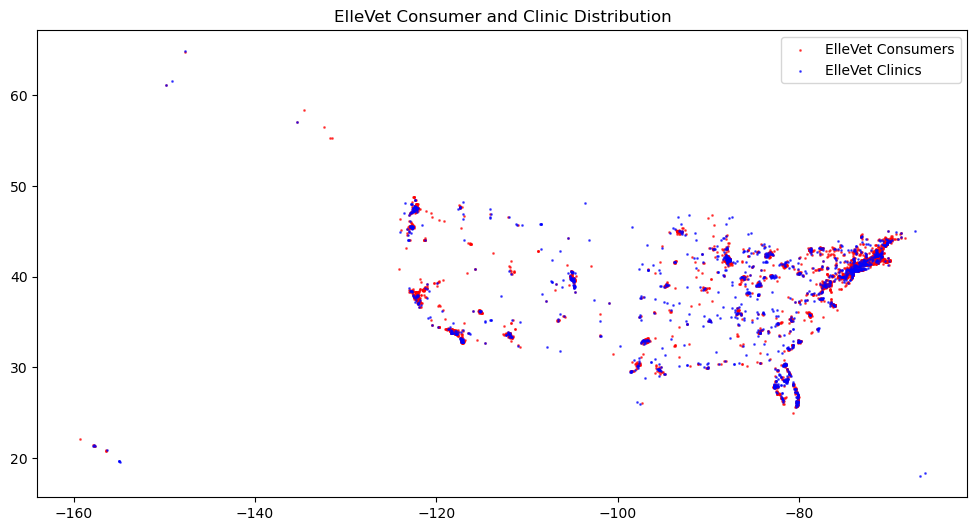

In [79]:
import geopandas as gpd

# Convert consumer and clinic data into GeoDataFrames
consumer_gdf = gpd.GeoDataFrame(consumer_df, geometry=gpd.points_from_xy(consumer_df.longitude, consumer_df.latitude))
vet_gdf = gpd.GeoDataFrame(vet_df, geometry=gpd.points_from_xy(vet_df.longitude, vet_df.latitude))

# Plot consumer and clinic locations
base = consumer_gdf.plot(color='red', markersize=1, alpha=0.6, label='ElleVet Consumers', figsize=(12, 8))
vet_gdf.plot(ax=base, color='blue', markersize=1, alpha=0.6, label='ElleVet Clinics')
plt.legend()
plt.title('ElleVet Consumer and Clinic Distribution')
plt.show()


In [ ]:
### Feature Demo: Distance from a given clinic to Nearest β Clinic ###

from haversine import haversine, Unit

# Example datasets
# Imagine we have a DataFrame of non-ElleVet clinics
clinic_data = {
    "clinic_id": [1, 2, 3],
    "latitude": [40.7128, 34.0522, 41.8781],
    "longitude": [-74.0060, -118.2437, -87.6298],
}
clinics = pd.DataFrame(clinic_data)

# β Clinics DataFrame (ElleVet-carrying clinics)
beta_clinic_data = {
    "beta_clinic_id": [101, 102],
    "latitude": [42.3601, 36.1627],
    "longitude": [-71.0589, -86.7816],
}
beta_clinics = pd.DataFrame(beta_clinic_data)

# Calculate the minimum distance to β clinics for each clinic
def calculate_min_distance(clinics_df, beta_clinics_df):
    min_distances = []

    for _, clinic in clinics_df.iterrows():
        clinic_coords = (clinic["latitude"], clinic["longitude"])
        distances = []

        for _, beta_clinic in beta_clinics_df.iterrows():
            beta_coords = (beta_clinic["latitude"], beta_clinic["longitude"])
            distance = haversine(clinic_coords, beta_coords, unit=Unit.MILES)  # Distance in miles
            distances.append(distance)

        min_distances.append(min(distances))  # Minimum distance to any β clinic

    clinics_df["distance_to_beta"] = min_distances
    return clinics_df

# Compute the distances
clinics_with_distances = calculate_min_distance(clinics, beta_clinics)


### Next Steps ###

We need a training set in which 'is_z_vet' is the target column, along with geolocation features, engineered features, and other demographic and sociaeconomic variables as the dataframe we created above (for each clinic).

Step 1: Identify the geographic scope
- Define areas of interest: Focus on regions where we already have high-density ElleVet consumers (∂) and a lack of β clinics (existing ElleVet-carrying clinics).
- Filter target locations: Use clustering results or visualizations to prioritize zip codes, cities, or regions for data collection.

Step 2: Use Google Maps to find non-ElleVet clinics
Google Maps API or manual search can help identify clinics that might not currently carry ElleVet products.

Step 3: Label data for training
Manually classify the clinics based on known information:
- Known β clinics: Label clinics already carrying ElleVet as 0.
- Suspected Z vets: Clinics in high consumer-density areas, far from β clinics, but potentially recommending ElleVet, can be labeled as 1 (or unlabeled if uncertain).
- Non-recommenders: Clinics without ElleVet consumer activity or proximity might be labeled as 0.

Step 4: Train model
Use the collected data and engineered features to train a propensity model for predicting Z vets:
- Customer density in each city/ zip code
- Distance to β clinics
- Demographics (population, income)
- Other clinic characteristics if any

Step 5: Validate the model
Manually validate a subset of high-prediction Z vets:
- Contact clinics to confirm if they recommend ElleVet.
- Use online resources (websites, reviews) to infer if the clinic recommends ElleVet.